In [1]:
import requests
import yfinance as yf # Used to grab the stock prices, with yahoo
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from utils.MCForecastTools import MCSimulation


In [2]:
amazon = yf.Ticker("AMZN")
walmart = yf.Ticker("WMT")
ebay = yf.Ticker("EBAY")
target = yf.Ticker("TGT")
overstock = yf.Ticker("OSTK")
print(walmart)

yfinance.Ticker object <WMT>


In [3]:
total_investment = 500000

#Amazon Data
initial_amazon_price = 1627.800049
initial_amazon_investment = 100000
amount_of_amazon_stock = initial_amazon_investment/initial_amazon_price
current_amazon_price = amazon.info['open']
current_amazon_investment_value = current_amazon_price * amount_of_amazon_stock

#Walmart Data
initial_walmart_price = 97.519066
initial_walmart_investment = 100000
amount_of_walmart_stock = initial_walmart_investment/initial_walmart_price
current_walmart_price = walmart.info['open']
current_walmart_investment_value = current_walmart_price * amount_of_walmart_stock

#Ebay Data
initial_ebay_price = 28.541014
initial_ebay_investment = 100000
amount_of_ebay_stock = initial_ebay_investment/initial_ebay_price
current_ebay_price = ebay.info['open']
current_ebay_investment_value = current_ebay_price * amount_of_ebay_stock

#Target Data
initial_target_price = 79.590614
initial_target_investment = 100000
amount_of_target_stock = initial_target_investment/initial_target_price
current_target_price = target.info['open']
current_target_investment_value = current_target_price * amount_of_target_stock

#Overstock Data
initial_overstock_price = 19.799999
initial_overstock_investment = 100000
amount_of_overstock_stock = initial_overstock_investment/initial_overstock_price
current_overstock_price = overstock.info['open']
current_overstock_investment_value = current_overstock_price * amount_of_overstock_stock


print("Current Amazon Price:",current_amazon_price)
print("Current Amazon Investment Value:",current_amazon_investment_value)
print("Current Walmart Price:",current_walmart_price)
print("Current Walmart Investment Value:",current_walmart_investment_value)
print("Current Ebay Price:",current_ebay_price)
print("Current Ebay Investment Value:",current_ebay_investment_value)
print("Current Target Price:",current_target_price)
print("Current Target Investment Value:",current_target_investment_value)
print("Current Overstock Price:",current_overstock_price)
print("Current Overstock Investment Value:",current_overstock_investment_value)

Current Amazon Price: 3515.25
Current Amazon Investment Value: 215950.97027792264
Current Walmart Price: 149.52
Current Walmart Investment Value: 153323.86386883567
Current Ebay Price: 74.1
Current Ebay Investment Value: 259626.3748723153
Current Target Price: 252.78
Current Target Investment Value: 317600.26376979577
Current Overstock Price: 105.67
Current Overstock Investment Value: 533686.8956407523


# Amazon Expected Rate of Return Calculations

In [4]:
amazon_historical_year1_begin = amazon.history(start="2018-11-05", end="2018-11-06")
amazon_historical_year1_end = amazon.history(start="2019-11-05", end="2019-11-06")
initial_value_year1_amazon = amazon_historical_year1_begin['Close']['2018-11-05']
current_value_year1_amazon= amazon_historical_year1_end['Close']['2019-11-05']

In [5]:
year1_ror_amazon = ((current_value_year1_amazon - initial_value_year1_amazon)/initial_value_year1_amazon)*100

year1_ror_amazon

10.683739211985838

In [6]:
amazon_historical_year2_begin = amazon.history(start="2019-11-05", end="2019-11-06")
amazon_historical_year2_end = amazon.history(start="2020-11-05", end="2020-11-06")
initial_value_year2_amazon = amazon_historical_year2_begin['Close']['2019-11-05']
current_value_year2_amazon= amazon_historical_year2_end['Close']['2020-11-05']

In [7]:
year2_ror_amazon = ((current_value_year2_amazon - initial_value_year2_amazon)/initial_value_year2_amazon)*100

year2_ror_amazon

84.38039817859662

In [8]:
amazon_historical_year3_begin = amazon.history(start="2020-11-05", end="2020-11-06")
amazon_historical_year3_end = amazon.history(start="2021-11-03", end="2021-11-04")
initial_value_year3_amazon = amazon_historical_year3_begin['Close']['2020-11-05']
current_value_year3_amazon= amazon_historical_year3_end['Close']['2021-11-03']

In [9]:
year3_ror_amazon = ((current_value_year3_amazon - initial_value_year3_amazon)/initial_value_year3_amazon)*100

year3_ror_amazon

1.8663455749548463

In [10]:
expected_ror_amazon = (year1_ror_amazon + year2_ror_amazon + year3_ror_amazon)/3

expected_ror_amazon

32.310160988512436

# Walmart Expected Rate of Return Calculations

In [11]:
walmart_historical_year1_begin = walmart.history(start="2018-11-05", end="2018-11-06")
walmart_historical_year1_end = walmart.history(start="2019-11-05", end="2019-11-06")
initial_value_year1_wmt = walmart_historical_year1_begin['Close']['2018-11-05']
current_value_year1_wmt= walmart_historical_year1_end['Close']['2019-11-05']

In [12]:
year1_ror_wmt = ((current_value_year1_wmt - initial_value_year1_wmt)/initial_value_year1_wmt)*100

year1_ror_wmt

17.95209629278384

In [13]:
walmart_historical_year2_begin = walmart.history(start="2019-11-05", end="2019-11-06")
walmart_historical_year2_end = walmart.history(start="2020-11-05", end="2020-11-06")
initial_value_year2_wmt = walmart_historical_year2_begin['Close']['2019-11-05']
current_value_year2_wmt= walmart_historical_year2_end['Close']['2020-11-05']

In [14]:
year2_ror_wmt = ((current_value_year2_wmt - initial_value_year2_wmt)/initial_value_year2_wmt)*100

year2_ror_wmt

22.821495133636702

In [15]:
walmart_historical_year3_begin = walmart.history(start="2020-11-05", end="2020-11-06")
walmart_historical_year3_end = walmart.history(start="2021-11-03", end="2021-11-04")
initial_value_year3_wmt = walmart_historical_year3_begin['Close']['2020-11-05']
current_value_year3_wmt= walmart_historical_year3_end['Close']['2021-11-03']

In [16]:
year3_ror_wmt = ((current_value_year3_wmt - initial_value_year3_wmt)/initial_value_year3_wmt)*100

year3_ror_wmt

6.302263743819454

In [17]:
expected_ror_wmt = (year1_ror_wmt + year2_ror_wmt + year3_ror_wmt)/3

expected_ror_wmt

15.69195172341333

# Ebay Expected Rate of Return Calculations

In [18]:
ebay_historical_year1_begin = ebay.history(start="2018-11-05", end="2018-11-06")
ebay_historical_year1_end = ebay.history(start="2019-11-05", end="2019-11-06")
initial_value_year1_ebay = ebay_historical_year1_begin['Close']['2018-11-05']
current_value_year1_ebay= ebay_historical_year1_end['Close']['2019-11-05']

In [19]:
year1_ror_ebay = ((current_value_year1_ebay - initial_value_year1_ebay)/initial_value_year1_ebay)*100

year1_ror_ebay

21.036553031530747

In [20]:
ebay_historical_year2_begin = ebay.history(start="2019-11-05", end="2019-11-06")
ebay_historical_year2_end = ebay.history(start="2020-11-05", end="2020-11-06")
initial_value_year2_ebay = ebay_historical_year2_begin['Close']['2019-11-05']
current_value_year2_ebay= ebay_historical_year2_end['Close']['2020-11-05']

In [21]:
year2_ror_ebay = ((current_value_year2_ebay - initial_value_year2_ebay)/initial_value_year2_ebay)*100

year2_ror_ebay

41.37554974539474

In [22]:
ebay_historical_year3_begin = ebay.history(start="2020-11-05", end="2020-11-06")
ebay_historical_year3_end = ebay.history(start="2021-11-03", end="2021-11-04")
initial_value_year3_ebay = ebay_historical_year3_begin['Close']['2020-11-05']
current_value_year3_ebay= ebay_historical_year3_end['Close']['2021-11-03']

In [23]:
year3_ror_ebay = ((current_value_year3_ebay - initial_value_year3_ebay)/initial_value_year3_ebay)*100

year3_ror_ebay

54.48945270214486

In [24]:
expected_ror_ebay = (year1_ror_ebay + year2_ror_ebay + year3_ror_ebay)/3

expected_ror_ebay

38.96718515969012

# Target Expected Rate of Return Calculations

In [25]:
target_historical_year1_begin = target.history(start="2018-11-05", end="2018-11-06")
target_historical_year1_end = target.history(start="2019-11-05", end="2019-11-06")
initial_value_year1_target = target_historical_year1_begin['Close']['2018-11-05']
current_value_year1_target= target_historical_year1_end['Close']['2019-11-05']

In [26]:
year1_ror_target = ((current_value_year1_target - initial_value_year1_target)/initial_value_year1_target)*100

year1_ror_target

33.3721142792069

In [27]:
target_historical_year2_begin = target.history(start="2019-11-05", end="2019-11-06")
target_historical_year2_end = target.history(start="2020-11-05", end="2020-11-06")
initial_value_year2_target = target_historical_year2_begin['Close']['2019-11-05']
current_value_year2_target= target_historical_year2_end['Close']['2020-11-05']

In [28]:
year2_ror_target = ((current_value_year2_target - initial_value_year2_target)/initial_value_year2_target)*100

year2_ror_target

47.307620628610564

In [29]:
target_historical_year3_begin = target.history(start="2020-11-05", end="2020-11-06")
target_historical_year3_end = target.history(start="2021-11-03", end="2021-11-04")
initial_value_year3_target = target_historical_year3_begin['Close']['2020-11-05']
current_value_year3_target= target_historical_year3_end['Close']['2021-11-03']

In [30]:
year3_ror_target = ((current_value_year3_target - initial_value_year3_target)/initial_value_year3_target)*100

year3_ror_target

66.5350453183703

In [31]:
expected_ror_target = (year1_ror_target + year2_ror_target + year3_ror_target)/3

expected_ror_target

49.07159340872926

# Overstock Expected Rate of Return Calculations

In [32]:
overstock_historical_year1_begin = overstock.history(start="2018-11-05", end="2018-11-06")
overstock_historical_year1_end = overstock.history(start="2019-11-05", end="2019-11-06")
initial_value_year1_overstock = overstock_historical_year1_begin['Close']['2018-11-05']
current_value_year1_overstock= overstock_historical_year1_end['Close']['2019-11-05']

In [33]:
year1_ror_overstock = ((current_value_year1_overstock - initial_value_year1_overstock)/initial_value_year1_overstock)*100

year1_ror_overstock

-49.34343374015091

In [34]:
overstock_historical_year2_begin = overstock.history(start="2019-11-05", end="2019-11-06")
overstock_historical_year2_end = overstock.history(start="2020-11-05", end="2020-11-06")
initial_value_year2_overstock = overstock_historical_year2_begin['Close']['2019-11-05']
current_value_year2_overstock= overstock_historical_year2_end['Close']['2020-11-05']

In [35]:
year2_ror_overstock = ((current_value_year2_overstock - initial_value_year2_overstock)/initial_value_year2_overstock)*100

year2_ror_overstock

583.3499774702757

In [36]:
overstock_historical_year3_begin = overstock.history(start="2020-11-05", end="2020-11-06")
overstock_historical_year3_end = overstock.history(start="2021-11-03", end="2021-11-04")
initial_value_year3_overstock = overstock_historical_year3_begin['Close']['2020-11-05']
current_value_year3_overstock= overstock_historical_year3_end['Close']['2021-11-03']

In [37]:
year3_ror_overstock = ((current_value_year3_overstock - initial_value_year3_overstock)/initial_value_year3_overstock)*100

year3_ror_overstock

52.90341647488361

In [38]:
expected_ror_overstock = (year1_ror_overstock + year2_ror_overstock + year3_ror_overstock)/3

expected_ror_overstock

195.6366534016695

In [39]:
amazon_history = amazon.history(period = "3y")

amazon_history['Close']

Date
2018-11-09    1712.430054
2018-11-12    1636.849976
2018-11-13    1631.170044
2018-11-14    1599.010010
2018-11-15    1619.439941
                 ...     
2021-11-03    3384.000000
2021-11-04    3477.000000
2021-11-05    3518.989990
2021-11-08    3488.979980
2021-11-09    3568.820068
Name: Close, Length: 755, dtype: float64

In [40]:
walmart_history = walmart.history(period = "3y")

walmart_history['Close']

Date
2018-11-09    100.030228
2018-11-12     98.428772
2018-11-13     97.547493
2018-11-14     96.211342
2018-11-15     94.325592
                 ...    
2021-11-03    150.179993
2021-11-04    151.279999
2021-11-05    150.229996
2021-11-08    149.270004
2021-11-09    149.280106
Name: Close, Length: 755, dtype: float64

In [41]:
ebay_history = ebay.history(period = "3y")

ebay_history['Close']

Date
2018-11-09    28.531384
2018-11-12    27.886223
2018-11-13    27.058113
2018-11-14    26.855898
2018-11-15    27.125515
                ...    
2021-11-03    75.449997
2021-11-04    76.279999
2021-11-05    75.570000
2021-11-08    73.760002
2021-11-09    74.209999
Name: Close, Length: 755, dtype: float64

In [42]:
target_history = target.history(period = "3y")

target_history['Close']

Date
2018-11-09     81.073326
2018-11-12     79.702515
2018-11-13     78.630119
2018-11-14     77.520416
2018-11-15     75.310356
                 ...    
2021-11-03    260.410004
2021-11-04    260.440002
2021-11-05    254.270004
2021-11-08    253.330002
2021-11-09    254.085007
Name: Close, Length: 755, dtype: float64

In [43]:
overstock_history = overstock.history(period = "3y")

overstock_history['Close']

Date
2018-11-09     17.200001
2018-11-12     17.760000
2018-11-13     17.790001
2018-11-14     16.950001
2018-11-15     17.530001
                 ...    
2021-11-03    104.800003
2021-11-04    104.889999
2021-11-05    104.459999
2021-11-08    105.360001
2021-11-09    102.029999
Name: Close, Length: 755, dtype: float64

In [44]:
start = datetime(2018, 11, 5)
symbols_list = ['AMZN', 'WMT', 'EBAY', 'TGT', 'OSTK']


In [45]:
overstock_df = pd.DataFrame(data = overstock_history['Close'])
target_df = pd.DataFrame(data = target_history['Close'])
ebay_df = pd.DataFrame(data = ebay_history['Close'])
walmart_df = pd.DataFrame(data = walmart_history['Close'])
amazon_df = pd.DataFrame(data = amazon_history['Close'])


dataframe = pd.concat([overstock_df, target_df, ebay_df, walmart_df, amazon_df], axis = 1)

dataframe.columns = [ "Overstock", "Target", "Ebay", "Walmart", "Amazon"]
display(dataframe)

,Overstock,Target,Ebay,Walmart,Amazon
Date,,,,,
2018-11-09,17.200001,81.073326,28.531384,100.030228,1712.430054
2018-11-12,17.760000,79.702515,27.886223,98.428772,1636.849976
2018-11-13,17.790001,78.630119,27.058113,97.547493,1631.170044
2018-11-14,16.950001,77.520416,26.855898,96.211342,1599.010010
2018-11-15,17.530001,75.310356,27.125515,94.325592,1619.439941
...,...,...,...,...,...
2021-11-03,104.800003,260.410004,75.449997,150.179993,3384.000000
2021-11-04,104.889999,260.440002,76.279999,151.279999,3477.000000
2021-11-05,104.459999,254.270004,75.570000,150.229996,3518.989990


In [46]:
corr_df = dataframe.corr(method='pearson')
 #reset symbol as index (rather than 0-X)
corr_df.head().reset_index()
corr_df.head(10)

,Overstock,Target,Ebay,Walmart,Amazon
Overstock,1.000000,0.827325,0.882567,0.805440,0.921022
Target,0.827325,1.000000,0.935990,0.896351,0.887518
Ebay,0.882567,0.935990,1.000000,0.851760,0.922339
Walmart,0.805440,0.896351,0.851760,1.000000,0.921266
Amazon,0.921022,0.887518,0.922339,0.921266,1.000000


<AxesSubplot:>

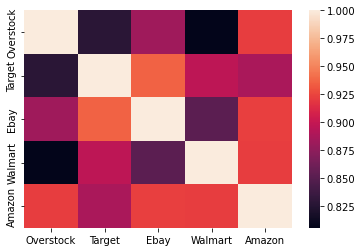

In [47]:
# Create a heatmap from the correlation values
sns.heatmap(corr_df)

# Overstock Portfolio Variances

In [48]:
overstock_std = float(overstock_df['Close'].std())/100
target_std = float(target_df['Close'].std())/100
ebay_std = float(ebay_df['Close'].std())/100
walmart_std = float(walmart_df['Close'].std())/100
amazon_std = float(amazon_df['Close'].std())/100

In [49]:
display(overstock_std)
display(target_std)
display(ebay_std)
display(walmart_std)
display(amazon_std)

0.3247279286055989

0.6051369011878642

0.1405149431275516

0.18677614478857005

7.227408352989738

In [50]:
def variance(weight1, std_1, weight2, std_2, corr_ratio):
    variance = (((weight1 ** 2) * (std_1 ** 2)) + ((weight2 ** 2) * (std_2 ** 2)) + ((weight1 ** 2) * (std_1 ** 2) * (weight2 ** 2) * (std_2 ** 2) * (corr_ratio)))
    return variance
                                                                                 

In [51]:
ostk_to_target_variance = variance(.50,overstock_std,.50,target_std,0.825182)
ostk_to_ebay_variance = variance(.50,overstock_std,.50,ebay_std,0.880374)
ostk_to_walmart_variance = variance(.50,overstock_std,.50,walmart_std,0.803650)
ostk_to_amazon_variance = variance(.50,overstock_std,.50,amazon_std,0.825182)

ostk_to_target_percentage = "{:.2%}".format(ostk_to_target_variance)
ostk_to_ebay_percentage = "{:.2%}".format(ostk_to_ebay_variance)
ostk_to_walmart_percentage = "{:.2%}".format(ostk_to_walmart_variance)
ostk_to_amazon_percentage = "{:.2%}".format(ostk_to_amazon_variance)

print("Overstock and Target Portfolio Variance",ostk_to_target_percentage)
print("Overstock and Ebay Portfolio Variance",ostk_to_ebay_percentage)
print("Overstock and Walmart Portfolio Variance",ostk_to_walmart_percentage)
print("Overstock and Amazon Portfolio Variance",ostk_to_amazon_percentage)

Overstock and Target Portfolio Variance 11.99%
Overstock and Ebay Portfolio Variance 3.14%
Overstock and Walmart Portfolio Variance 3.53%
Overstock and Amazon Portfolio Variance 1336.93%


In [52]:
tgt_to_ebay_variance = variance(.50,target_std,.50,ebay_std,0.935200)
tgt_to_walmart_variance = variance(.50,target_std,.50,walmart_std,0.895973)
tgt_to_amazon_variance = variance(.50,target_std,.50,amazon_std,0.887384)

tgt_to_ebay_percentage = "{:.2%}".format(tgt_to_ebay_variance)
tgt_to_walmart_percentage = "{:.2%}".format(tgt_to_walmart_variance)
tgt_to_amazon_percentage = "{:.2%}".format(tgt_to_amazon_variance)


print("Target and Ebay Portfolio Variance",tgt_to_ebay_percentage)
print("Target and Walmart Portfolio Variance",tgt_to_walmart_percentage)
print("Target and Amazon Portfolio Variance",tgt_to_amazon_percentage)

Target and Ebay Portfolio Variance 9.69%
Target and Walmart Portfolio Variance 10.10%
Target and Amazon Portfolio Variance 1421.13%


In [53]:
ebay_to_walmart_variance = variance(.50,ebay_std,.50,walmart_std,0.851683)
ebay_to_amazon_variance = variance(.50,ebay_std,.50,amazon_std,0.922619)

ebay_to_walmart_percentage = "{:.2%}".format(ebay_to_walmart_variance)
ebay_to_amazon_percentage = "{:.2%}".format(ebay_to_amazon_variance)


print("Ebay and Walmart Portfolio Variance",ebay_to_walmart_percentage)
print("Ebay and Amazon Portfolio Variance",ebay_to_amazon_percentage)

Ebay and Walmart Portfolio Variance 1.37%
Ebay and Amazon Portfolio Variance 1312.33%


In [54]:
walmart_to_amazon_variance = variance(.50,walmart_std,.50,amazon_std,0.921194)

walmart_to_amazon_percentage = "{:.2%}".format(walmart_to_amazon_variance)

print("Walmart and Amazon Portfolio Variance",walmart_to_amazon_percentage)

Walmart and Amazon Portfolio Variance 1317.25%


Monte Carlo Simulation

In [55]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv("/Users/johannmaiga/Downloads/MyFiles/FinTech Class/.api_keys")

True

In [56]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [57]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["AMZN", "WMT", "EBAY", "TGT", "OSTK"]

# Set timeframe to 1D 
timeframe = "1D"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start = pd.Timestamp("2018-11-05", tz="America/New_York").isoformat()
end = pd.Timestamp("2021-11-04", tz="America/New_York").isoformat()

# Set number of rows to 1000 to retrieve the maximum amount of rows
limit_rows = 1000

In [58]:
ecom_stocks = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end,
    limit = limit_rows
).df


# Display both the first and last five rows of the DataFrame
ecom_stocks.index = ecom_stocks.index.date
ecom_stocks.head()

AMZN                                          EBAY          \
               open       high       low    close   volume   open    high   
2018-11-05  1657.57  1658.0900  1596.360  1627.45  5231856  29.91  30.060   
2018-11-06  1618.35  1665.0000  1614.550  1642.86  4000487  29.59  30.260   
2018-11-07  1673.00  1759.2300  1664.075  1757.36  7606948  30.09  30.180   
2018-11-08  1752.89  1784.0000  1725.110  1754.95  3299391  29.74  29.967   
2018-11-09  1735.12  1743.9207  1701.870  1712.03  2962981  29.62  29.950   

                                     ...    TGT                          \
              low   close    volume  ...   open    high      low  close   
2018-11-05  29.33  29.630   7945882  ...  84.56  85.520  84.1086  85.33   
2018-11-06  29.46  29.950  11913131  ...  85.44  85.670  84.9300  85.56   
2018-11-07  29.59  29.850  17014253  ...  87.51  87.660  85.7600  86.72   
2018-11-08  29.52  29.845   8355718  ...  87.00  87.855  86.7901  87.60   
2018-11-09  29.58  29.630   7301539  ...  87.44  87.930  86.6700  86.96   

                          WMT                                       
               volume    open      high       low   close   volume  
2018-11-05  3065961.0  101.19  103.1692  100.6324  102.89  5272222  
2018-11-06  3218972.0  102.54  103.4400  102.0500  103.32  4385000  
2018-11-07  6164998.0  103.66  104.4700  103.0500  104.34  5589694  
2018-11-08  3516326.0  104.33  105.2600  104.0300  104.89  4099279  
2018-11-09  2715011.0  105.00  105.9000  104.8100  105.55  5650275  

[5 rows x 25 columns]

In [59]:
one_year_simulation = MCSimulation(
    portfolio_data=ecom_stocks,
    weights=[0.25, 0.75],
    num_simulation=500,
    num_trading_days=252,
)

# Review the simulation input data
one_year_simulation.portfolio_data.dropna()

AMZN                                                      \
               open       high       low    close   volume daily_return   
2018-11-06  1618.35  1665.0000  1614.550  1642.86  4000487     0.009469   
2018-11-07  1673.00  1759.2300  1664.075  1757.36  7606948     0.069696   
2018-11-08  1752.89  1784.0000  1725.110  1754.95  3299391    -0.001371   
2018-11-09  1735.12  1743.9207  1701.870  1712.03  2962981    -0.024457   
2018-11-12  1699.67  1708.5500  1630.010  1636.79  3229882    -0.043948   
...             ...        ...       ...      ...      ...          ...   
2021-10-29  3300.03  3374.8200  3273.320  3372.43  5462617    -0.020923   
2021-11-01  3366.04  3375.8600  3292.020  3317.99  3317329    -0.016143   
2021-11-02  3317.50  3331.1150  3283.550  3313.17  2364950    -0.001453   
2021-11-03  3310.46  3394.9200  3297.520  3384.00  3051730     0.021378   
2021-11-04  3371.29  3498.6250  3365.000  3477.04  5077538     0.027494   

             EBAY                          ...       TGT                     \
             open    high     low   close  ...       low   close     volume   
2018-11-06  29.59  30.260  29.460  29.950  ...   84.9300   85.56  3218972.0   
2018-11-07  30.09  30.180  29.590  29.850  ...   85.7600   86.72  6164998.0   
2018-11-08  29.74  29.967  29.520  29.845  ...   86.7901   87.60  3516326.0   
2018-11-09  29.62  29.950  29.580  29.630  ...   86.6700   86.96  2715011.0   
2018-11-12  29.60  29.700  28.910  28.960  ...   85.2400   85.46  3437712.0   
...           ...     ...     ...     ...  ...       ...     ...        ...   
2021-10-29  72.11  76.980  72.065  76.730  ...  256.5100  259.61  1603229.0   
2021-11-01  76.65  77.610  75.550  76.300  ...  257.4900  257.87  1526936.0   
2021-11-02  76.24  76.380  74.470  74.900  ...  258.5401  260.29  1729084.0   
2021-11-03  74.69  76.130  73.860  75.440  ...  256.7200  260.47  1969187.0   
2021-11-04  75.56  77.000  74.950  76.280  ...  259.4187  260.43  2152794.0   

                            WMT                                      \
           daily_return    open     high       low   close   volume   
2018-11-06     0.002695  102.54  103.440  102.0500  103.32  4385000   
2018-11-07     0.013558  103.66  104.470  103.0500  104.34  5589694   
2018-11-08     0.010148  104.33  105.260  104.0300  104.89  4099279   
2018-11-09    -0.007306  105.00  105.900  104.8100  105.55  5650275   
2018-11-12    -0.017249  105.50  106.210  103.6500  103.88  6950839   
...                 ...     ...      ...       ...     ...      ...   
2021-10-29     0.005578  147.94  150.099  147.5606  149.42  5577766   
2021-11-01    -0.006702  150.05  150.750  149.3500  149.80  3469224   
2021-11-02     0.009385  149.96  150.175  149.2800  149.72  3690780   
2021-11-03     0.000692  149.60  150.290  149.0300  150.19  3603828   
2021-11-04    -0.000154  150.18  151.848  149.8300  151.28  4142644   

                         
           daily_return  
2018-11-06     0.004179  
2018-11-07     0.009872  
2018-11-08     0.005271  
2018-11-09     0.006292  
2018-11-12    -0.015822  
...                 ...  
2021-10-29     0.006670  
2021-11-01     0.002543  
2021-11-02    -0.000534  
2021-11-03     0.003139  
2021-11-04     0.007257  

[753 rows x 30 columns]

In [60]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
one_year_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.


ValueError: Dot product shape mismatch, (253, 5) vs (2,)

In [ ]:
# Gathering historical data for our list of 5-10 Eommerce stocks from 2018-2021 and putting in into a dataframe

# selected_stocks = yf.download("AMZN", group_by='tickers', start="2018-11-05", end="2021-11-04")
# selected_stocks.head()

In [ ]:
# ecom_stocks.reset_index()
# selected_stocks.index = selected_stocks.index.date

In [ ]:
# cols = [4, 10, 16, 22, 28]

# cols = [4]
# ecom_stocks = selected_stocks.drop(selected_stocks.columns[cols], axis=1)
# ecom_stocks

In [ ]:
# Formatting the column names into lower case
# ecom_stocks.rename(str.lower, axis='columns')

In [ ]:
# ecom_stocks.reset_index(level=1)


In [ ]:
# one_year_simulation = MCSimulation(
#     portfolio_data=ecom_stocks,
#     weights=[0.25, 0.75],
#     num_simulation=500,
#     num_trading_days=252,
# )

# # Review the simulation input data
# ecom_stocks.portfolio_data.dropna()
# # ecom_stocks.calc_cumulative_return()